<a href="https://colab.research.google.com/github/julienVLNT/python-sandbox/blob/main/machine%20learning/rl_00_fondamentaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Julien VALENTIN**, **mars 2022**, notebook du M.O.O.C de l'université d'Alberta sur l'apprentissage par renforcement.

> https://www.coursera.org/learn/fundamentals-of-reinforcement-learning

Sur la base du livre *Reinforcement learning, an introduction*, deuxième édition, par Richard S. SUTTON et Andrew G. BARTO : chapitres $2$, $3$ et $4$.

In [ ]:
from matplotlib import pyplot
import numpy

### Première semaine : introduction par le problème des bandits

Visualisation de l'impact de la pénalisation $\alpha$. Le coefficient $\alpha$ dépendant du temps étant le dernier résultat. On rappelle que

$$ Q_{t+1} = Q_{t} + \alpha \left( R_t - Q_t \right) $$

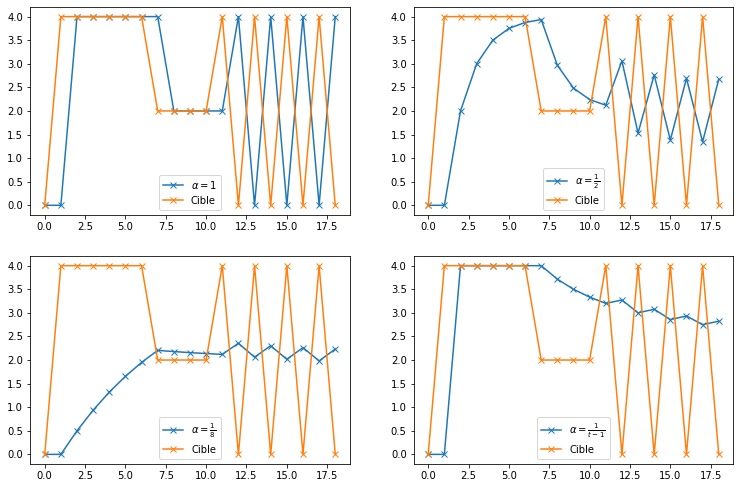

In [ ]:
target = numpy.array([0, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 0, 4, 0, 4, 0, 4, 0])
time   = list(range(target.size))
alpha_ = numpy.array([1., 1./2, 1./8])
predic = numpy.zeros((4, target.shape[0]))

for t in range(1, target.shape[0]):
    for i in range(3):
        predic[i, t] = predic[i, t-1] + alpha_[i] * ( target[t-1] - predic[i, t-1] )
    if t > 1:
        predic[3,t] = predic[3,t-1] + 1./(t-1) * ( target[t-1] - predic[3, t-1] )

figure, ax, = pyplot.subplots(2, 2)
figure.set_figwidth(2.1*figure.get_figwidth())
figure.set_figheight(2.1*figure.get_figheight())

ax[0,0].plot(time, predic[0,:], label=r"$\alpha=1.$", marker="x")
ax[0,0].plot(time, target, label="Cible", marker="x")
ax[0,0].legend()

ax[0,1].plot(time, predic[1,:], label=r"$\alpha=\frac{1}{2}$", marker="x")
ax[0,1].plot(time, target, label="Cible", marker="x")
ax[0,1].legend()

ax[1,0].plot(time, predic[2,:], label=r"$\alpha=\frac{1}{8}$", marker="x")
ax[1,0].plot(time, target, label="Cible", marker="x")
ax[1,0].legend()

ax[1,1].plot(time, predic[3,:], label=r"$\alpha=\frac{1}{t-1}$", marker="x")
ax[1,1].plot(time, target, label="Cible", marker="x")
ax[1,1].legend()

pyplot.show()

### Deuxième semaine : formalisme des processus de Markov discrets

Pour en savoir plus, le polycopié d'introduction au calcul stochastique de Jean-François LE GALL pour l'E.N.S : de la théorie de la mesure au mouvement brownien.

> https://www.imo.universite-paris-saclay.fr/~jflegall/IPPA2.pdf

### Troisième semaine : sur les équations de Bellmann

Quelques relations à retenir entre les politiques $\pi$, valeur d'état $v_\pi$ et valeur d'action $q_\pi$ optimales.

\begin{eqnarray}
v_*(s) & = & \max_{a}\left\{q_*(s,a)\right\} \\
q_*(s, a) & = & \sum_{s', r} p(s', r | a, s) \left[r + \gamma v_*(s') \right] \\
\pi_*(a, s) & = & 1 \text{ si } a = \text{argmax}_{a'}\left\{q_*(s, a')\right\} \text{ ; } 0 \text{ sinon} \\
\pi_*(a, s) & = & 1 \text{ si } v_*(s) = \sum_{s', r} p(s', r | a, s) \left[r + \gamma v_*(s') \right] \text{ ; } 0 \text{sinon}
\end{eqnarray}

### Quatrième semaine : programmation dynamique